## 2 Principal Component Analysis (PCA)
1. Apply PCA on Olivetti faces dataset, while preserving 99% of the variance. Then compute thereconstruction error for each image.
2. Next, take some of the images you built using the PCA (previous step) and modify/add somenoise to some of the images using techniques such as rotate, flip, and darken (use libraries suchas scikit-image [1]) and look at their reconstruction error. You should also notice how muchlarger the reconstruction error is.
3. Finally, plot all the three respective reconstructed images side-by-side (original image, imageafter PCA, image after PCA + noise) and compare the results.

In [1]:
#import the necessay packages
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
from skimage import io, transform, util, exposure

In [2]:
#retherive the face data 

faces = datasets.fetch_olivetti_faces ()
data=faces.data


In [3]:
#Question 2.1.1:Apply PCA on Olivetti faces dataset, while preserving 99% of the variance.
def pca_reconstructured(data, n_components):
    """
    This function allow people to apply pca model on the dataset and do the reconstruction
    data(object): the dataset users want to apply pca model on.
    n_components(int): the percentage of variance that the user wants to preserve.
    """
    pca = PCA(n_components, svd_solver='full')
    pca.fit(data)
    trans = pca.transform(data)
    reconstructed = pca.inverse_transform(trans)
    return reconstructed

In [4]:
face_reconstructed=pca_reconstructured(data,0.99)

In [5]:
#Question 2.1.2:Compute the reconstruction error for each image.

def re_err(data,re_data,type='var'):
    """
    This function allow users to use different way to measure the reconstruction errors.
    data(object): the original data 
    re_data(object):the reconstructed data
    type(str):'var' refers to the variance measurement; 'sq' refers to  sum of square difference between the original data and the reconstructured data
    """
    if type=='var':
        reconstruction_errors = np.mean((data - re_data)**2, axis=1)
    if type=='sq':
        reconstruction_errors = np.sum((data - re_data)**2, axis=1)
    print("Below are the reconstruction errors :",'\n',reconstruction_errors)
    return  reconstruction_errors

In [6]:
def reconstruction_err(data,n_component,type='var'):
    """
    This function applys the pca model on the dataset and compute the reconstruction error by different meansures.
    data(object): the dataset that user wants to apply PCA on.
    n_component(float):0<n_cpmponent<1, the percentage of variance that the user wants to perserve.
    type(str):'var' refers to the variance measurement; 'sq' refers to  sum of square difference between the original data and the reconstructured data
    """
    pca = PCA(n_components=n_component, whiten=True)
    data_pca = pca.fit_transform(data)
    data_reconstructed=pca.inverse_transform(data_pca)
    if type=='var':
        reconstruction_errors = np.mean((data - data_reconstructed)**2, axis=1)
    if type=='sq':
        reconstruction_errors = np.sum(np.square(data - data_reconstructed), axis=1)
    print('Below are the reconstruction error:','\n',reconstruction_errors)
    return reconstruction_errors, data_reconstructed

In [7]:
face_re_err=re_err(data,face_reconstructed,'sq')

Below are the reconstruction errors : 
 [1.0685257  0.68035996 0.67168486 1.1304203  0.43947586 0.38783133
 0.8712586  1.1481508  0.470665   0.24267581 0.3949275  0.4019584
 0.19419953 0.33274665 0.20216349 1.0056796  0.44699493 0.8613148
 0.7801426  0.71679115 1.1736524  0.83220655 0.93058735 1.0119075
 0.7305844  0.48350567 0.72454363 0.6709064  1.0751071  1.0778081
 0.28479525 0.2730174  0.12942114 1.1548853  1.0566138  0.5373822
 1.2730231  0.21388611 0.23216847 0.6453977  0.9998461  1.2192957
 1.1190193  0.9531505  1.1538672  1.1753218  1.0776671  0.679695
 0.9528226  1.0268209  1.4164462  1.3501242  1.1745355  1.0935688
 0.91589403 1.3063817  1.0272166  0.7417935  0.6632255  1.3080521
 0.65766805 0.15227696 0.57800287 0.14546463 0.21733546 0.4868967
 0.20654404 0.7485477  0.3479697  0.07293858 0.84132314 1.083658
 0.51186585 0.8984386  1.1423631  0.8703661  0.6715889  0.939883
 0.29394755 0.5453005  0.94277644 1.1239759  1.0553492  1.2154442
 1.0069273  1.0771152  0.8926369  1.14

In [8]:
#face_re_err=reconstruction_err(data,0.99,'var')

#### Remarks:
    In this assignment we define 2 functions to calculate the reconstruction errors,the first function combines model application and error calculation together which reduce the code we need to write, but since there are multiple outputs, the output will be tuple. Users need to do the further transformation to used it on other place.

    Therefore, if user only want to check the reconstuction error, reconstruction_err is the better choice. Otherwise, pca_reconstructed+re_err will be the better choice.
    
    In this assignment, since we need to do the further explore, we will use the second method.

In [9]:
#Question 2.2.1: modify/add somenoise to some of the images 

def modify_image(data,num,md_type):
    """
    This function allow user to do the specific modification on random figures in the data set.
    data(object): specific the data that user wants to modify 
    num(int): the number of figures that user wants to modify 
    md_type(str): the modify type have three option: 'rotate', 'flip','darken'
    """
    #choose the image
    image_index = random.sample(range(0,len(data)-1), num)
    images_to_modify = data[image_index]
    
    #modify the image
    modified_images=[]
    for image in images_to_modify: 
        if md_type=='rotate':
            modified_image = transform.rotate(image.reshape(64, 64), angle=60, mode='wrap').ravel()
        if md_type=='flip':
            modified_image = np.fliplr(image.reshape(64, 64)).ravel()
        if md_type=='darken':
            darkened_image = util.random_noise(image, mode='gaussian', var=0.1)
        modified_images.extend([modified_image])
    modified_images=pd.DataFrame(modified_images)
    return modified_images, image_index


In [10]:
#modified_images=modify_image(data,3,'flip')

#### Remarks:

    Above is the function which automatically choose the specific number of images to modified. However, since we want to compare the effects of different modification, we use the below cell which can apply three different ways on three different pictures.

In [11]:
#Question 2.2.1(another way): modify/add somenoise to some of the images (with 3 different ways )
modified_index = random.sample(range(0,len(data)-1), 3)
images_to_modify = data[modified_index]
modified_images=[]
rotated_image = transform.rotate(images_to_modify[0].reshape(64, 64), angle=60, mode='wrap').ravel()
modified_images.append(rotated_image)
fliped_image = np.fliplr(images_to_modify[1].reshape(64, 64)).ravel()
modified_images.append(fliped_image)
darkened_image = exposure.adjust_gamma(images_to_modify[2], gamma=3,gain=1)
modified_images.append(darkened_image)
modified_images=pd.DataFrame(modified_images)

In [12]:
#Question 2.2.2: applys on pca and shows the reconstruction error
modified_image_reconstructured=pca_reconstructured(modified_images,0.99)
modified_images_err=re_err(data[modified_index],modified_image_reconstructured,'sq')

Below are the reconstruction errors : 
 [221.00543 167.85597 495.1812 ]


In [13]:
#modified_images_re_err=reconstruction_err(modified_images,0.99,'var')

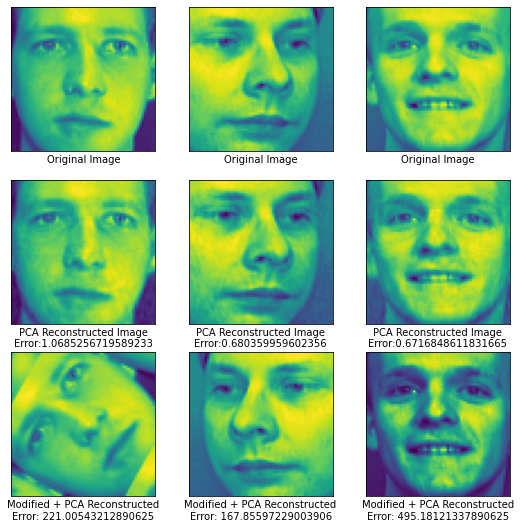

In [14]:
#Question 3: plot all the three respective reconstructed images side-by-side (original image, imageafter PCA, image after PCA + noise) and compare the results.
#set the plot format
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9,9))
#seperate the output of function to do the futher plotting 
#modified_index=modified_images[1] #the index of figures changed 
#face_reconstructed=face_re_err[1] # the reconstructed images
#face_re_err=face_re_err[0] #the reconstructed error 
#modified_image_reconstructured=modified_images_re_err[1] #the reconstructured modified images
#modified_images_err=modified_images_re_err[0]#the reconstructured error of modified images

for i, ax in enumerate(axes.flat):
    if i < 3:
        # Plot original image
        ax.imshow(faces.images[modified_index[i]])
        ax.set_xlabel("Original Image")
    elif i < 6:
        # Plot reconstructed image
        ax.imshow(face_reconstructed[modified_index[i-3]].reshape(64,64))
        ax.set_xlabel(f"PCA Reconstructed Image\nError:{face_re_err[i-3]}")
    else:
        # Plot modified+reconstructed image
        ax.imshow(modified_image_reconstructured[i-6].reshape(64,64))
        ax.set_xlabel(f"Modified + PCA Reconstructed\nError: {modified_images_err[i-6]}")
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

#### Remarks:
    The comment part in the above cells is the code which we need when we using the reconstruction_err function.  

### Conclusion
    In visualisation, we can discovered that the reconstructed images does not present large reconstruction error, since we preserve 99% of the variance. However, in the noise added part, we can see that since the image have been change significantly, the reconstruction error is much more higher than the reconstructed images of the original images. Moreover, the darken effect caused the biggest reconstructed error among three modification ways. The possible reason might be that the number and the variation level of the modified pixels on the darken modification is the most among three ways. 